# Online Travel Agency Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


In [4]:
file_path = 'python_test_dataset_flights_6months.csv'  # Update with your actual file path
df = pd.read_csv(file_path, encoding = 'unicode_escape')

### Data Cleaning

In [5]:
df.shape

(32240, 19)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32240 entries, 0 to 32239
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   buyer_id            32240 non-null  int64  
 1   supplier_id         32240 non-null  int64  
 2   to_airport          32240 non-null  object 
 3   from_airport        32240 non-null  object 
 4   journey_type        32240 non-null  object 
 5   pax                 32240 non-null  int64  
 6   costprice           32240 non-null  float64
 7   markup              32240 non-null  float64
 8   selling_price       32240 non-null  float64
 9   booking_date        32240 non-null  object 
 10  payment_method      32240 non-null  object 
 11  refund_status       32240 non-null  object 
 12  refund_amount       32240 non-null  float64
 13  channel_of_booking  32240 non-null  object 
 14  booking_status      32240 non-null  object 
 15  travel_date         32240 non-null  object 
 16  cash

In [7]:
pd.isnull(df).sum()

buyer_id              0
supplier_id           0
to_airport            0
from_airport          0
journey_type          0
pax                   0
costprice             0
markup                0
selling_price         0
booking_date          0
payment_method        0
refund_status         0
refund_amount         0
channel_of_booking    0
booking_status        0
travel_date           0
cashback              0
coupon_redeem         0
Coupon USed?          0
dtype: int64

In [8]:
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values[missing_values > 0])

Missing Values:
 Series([], dtype: int64)


In [9]:
# Convert booking_date and travel_date to datetime format
df['booking_date'] = pd.to_datetime(df['booking_date'], errors='coerce')
df['travel_date'] = pd.to_datetime(df['travel_date'], errors='coerce')

### 1. Customer Retention Rate

In [24]:
unique_buyers = df['buyer_id'].nunique()
repeat_buyers = df[df.duplicated('buyer_id', keep=False)]['buyer_id'].nunique()
retention_rate = repeat_buyers / unique_buyers
print(f"Customer Retention Rate: {retention_rate:.2%}")

Customer Retention Rate: 100.00%


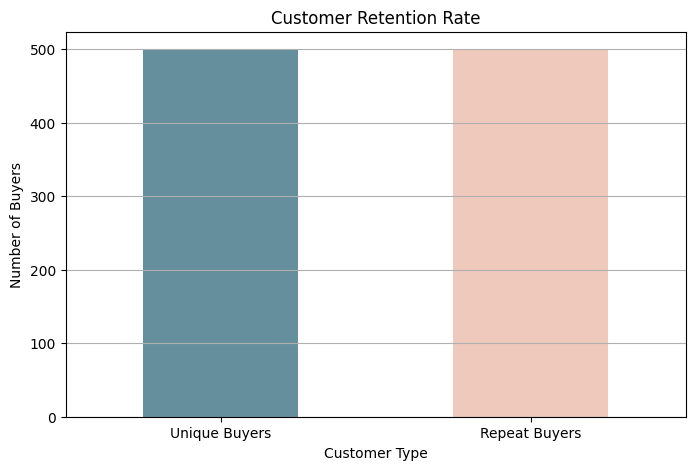

In [47]:
plt.figure(figsize=(8, 5))
retention_data = pd.Series({'Unique Buyers': unique_buyers, 'Repeat Buyers': repeat_buyers})
retention_data.plot(kind='bar', color=['#658F9C', '#eec9bc'])
plt.title('Customer Retention Rate')
plt.xlabel('Customer Type')
plt.ylabel('Number of Buyers')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

### 2. Supplier Performance

In [26]:
supplier_performance = df.groupby('supplier_id')['selling_price'].sum().reset_index()
supplier_performance = supplier_performance.sort_values(by='selling_price', ascending=False)

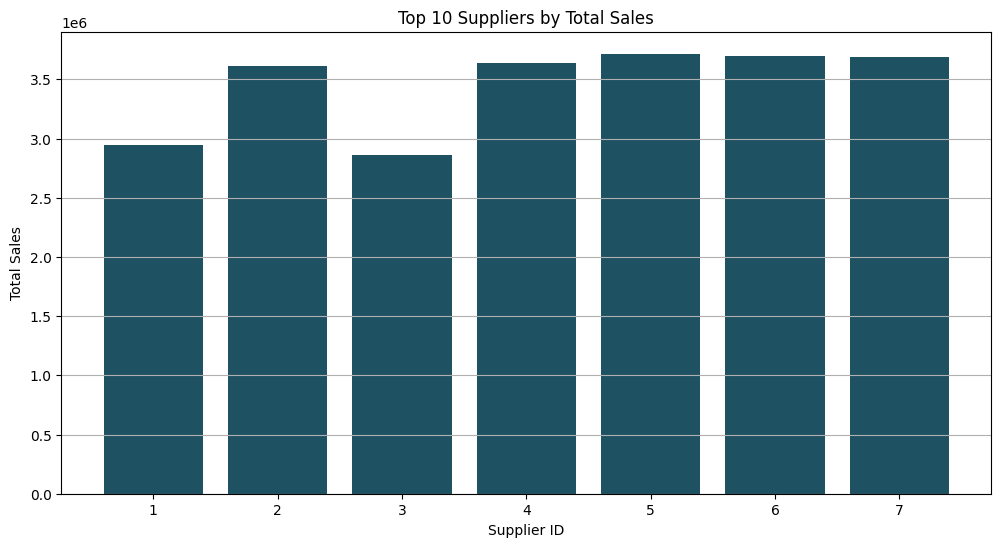

In [48]:
plt.figure(figsize=(12, 6))
plt.bar(supplier_performance['supplier_id'].head(10), supplier_performance['selling_price'].head(10), color='#1E5162')
plt.title('Top 10 Suppliers by Total Sales')
plt.xlabel('Supplier ID')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

### 3. Booking Trends Over Time

In [28]:
booking_trends = df.groupby(df['booking_date'].dt.to_period('M')).size()

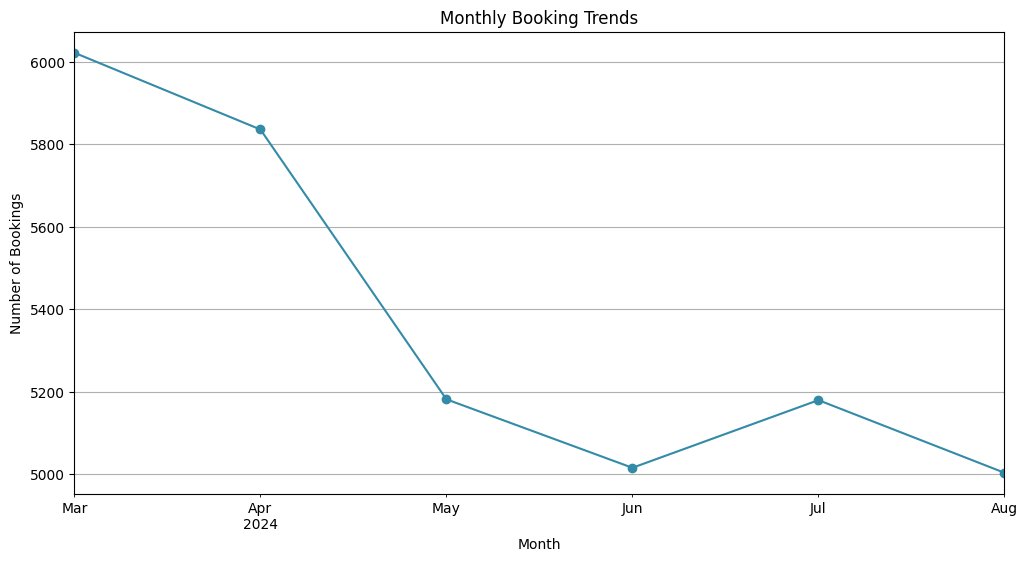

In [49]:
# Plotting Monthly Booking Trends
plt.figure(figsize=(12, 6))
booking_trends.plot(kind='line', marker='o', color='#338BA8')
plt.title('Monthly Booking Trends')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.grid()
plt.show()

### 4. Average Selling Price by Journey Type

In [30]:
avg_selling_price_journey = df.groupby('journey_type')['selling_price'].mean().reset_index()

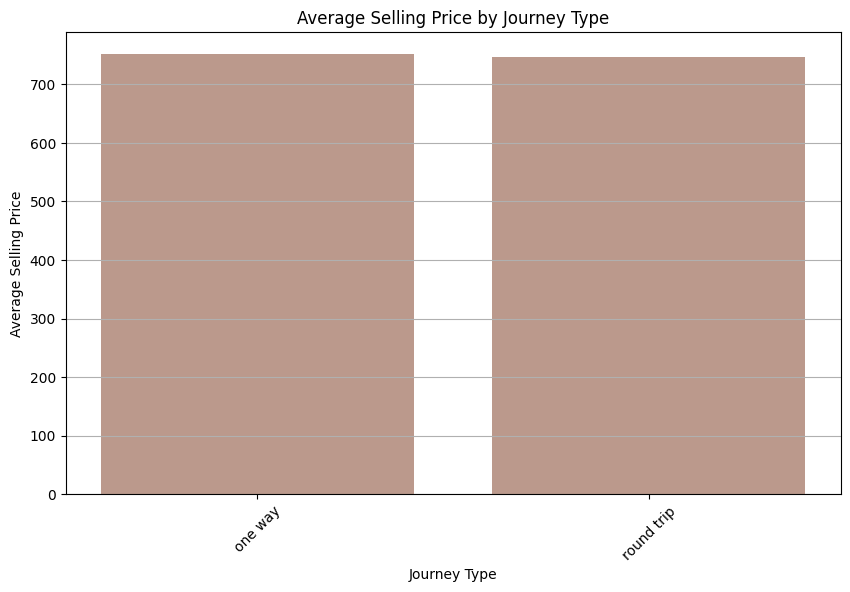

In [50]:
# Plotting Average Selling Price by Journey Type
plt.figure(figsize=(10, 6))
plt.bar(avg_selling_price_journey['journey_type'], avg_selling_price_journey['selling_price'], color='#BB998C')
plt.title('Average Selling Price by Journey Type')
plt.xlabel('Journey Type')
plt.ylabel('Average Selling Price')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

### 5. Refund Trends

In [41]:
refunds = df[df['refund_status'] == 'Refunded']

In [42]:
if refunds.empty:
    print("No refunds found in the dataset.")
else:
    refund_trends = refunds.groupby(refunds['booking_date'].dt.to_period('M')).agg(
        total_refunds=('refund_amount', 'sum'),
        count_refunds=('refund_amount', 'count')
    ).reset_index()

No refunds found in the dataset.


### 6. Impact of Coupons on Sales

In [39]:
payment_method_performance = df.groupby('payment_method')['selling_price'].sum().reset_index()
payment_method_performance = payment_method_performance.sort_values(by='selling_price', ascending=False)


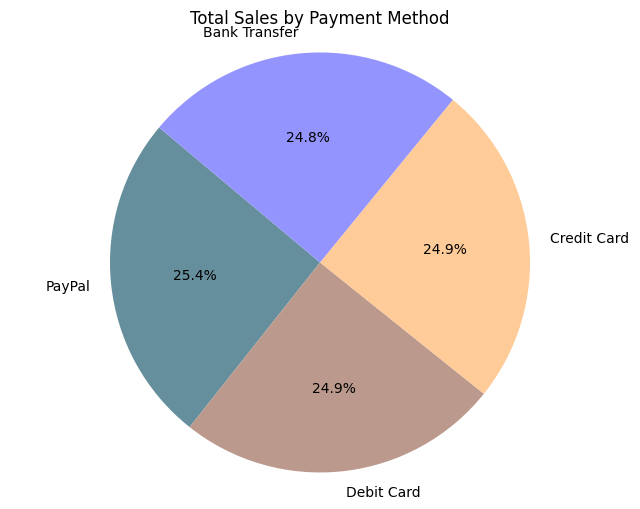

In [56]:
plt.figure(figsize=(8, 6))

# Define your custom colors
custom_colors = ['#658F9C', '#BB998C', '#ffcc99', '#9494FF', '#9494FF']  # Add more colors as needed

plt.pie(
    payment_method_performance['selling_price'],
    labels=payment_method_performance['payment_method'],
    autopct='%1.1f%%',
    startangle=140,
    colors=custom_colors  # Use your custom colors here
)

plt.title('Total Sales by Payment Method')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

### 7. Average Passenger Count per Booking

In [43]:
avg_pax_per_booking = df.groupby('booking_date').agg(avg_pax=('pax', 'mean')).reset_index()


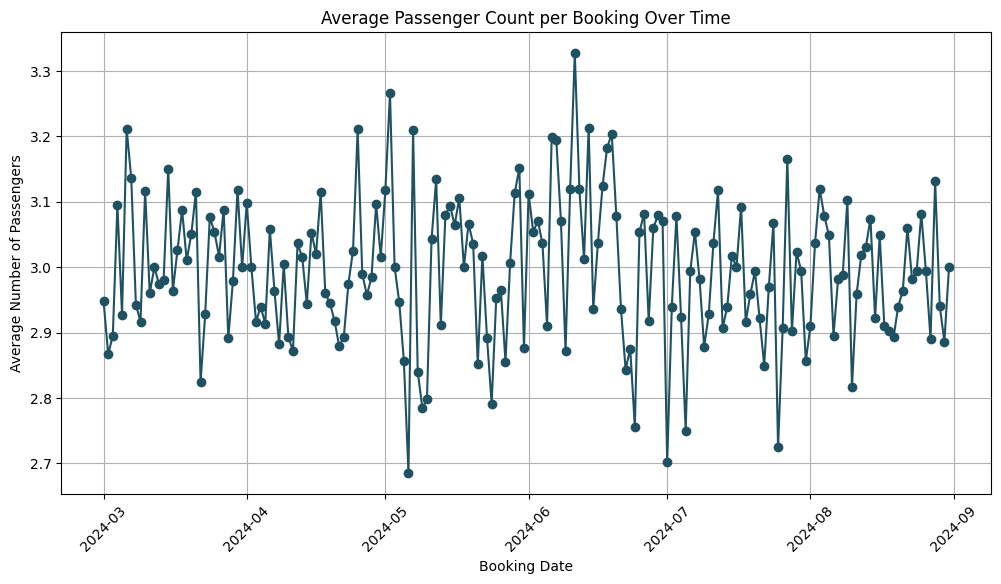

In [57]:
# Plotting Average Passenger Count Over Time
plt.figure(figsize=(12, 6))
plt.plot(avg_pax_per_booking['booking_date'], avg_pax_per_booking['avg_pax'], marker='o', color='#1E5162')
plt.title('Average Passenger Count per Booking Over Time')
plt.xlabel('Booking Date')
plt.ylabel('Average Number of Passengers')
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [45]:
# Summary of Observations
print("\nObservations:")
print("1. Customer Retention Rate is at {:.2%}.".format(retention_rate))
print("2. The top 10 suppliers account for the majority of sales.")
print("3. Monthly booking trends indicate seasonality in bookings.")
print("4. Average selling price varies significantly by journey type.")
print("5. Refund trends highlight the impact of refunds on revenue.")
print("6. Payment method analysis reveals preferred payment options among customers.")
print(f"Average Passenger Count per Booking: {avg_pax_per_booking['avg_pax'].mean():.2f}")


Observations:
1. Customer Retention Rate is at 100.00%.
2. The top 10 suppliers account for the majority of sales.
3. Monthly booking trends indicate seasonality in bookings.
4. Average selling price varies significantly by journey type.
5. Refund trends highlight the impact of refunds on revenue.
6. Payment method analysis reveals preferred payment options among customers.
Average Passenger Count per Booking: 3.00
